In [1]:
import pandas as pd 
import numpy as np 

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


There seem to be some null values present in the clean_comment column

In [5]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

LEt us try to see these

In [6]:
df[df['clean_comment'].isnull()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [7]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [8]:
df[df['category'].isnull()]

,clean_comment,category


I have decided to remove the null values as they form very less percentage of total data

In [9]:
df.dropna(inplace = True)

Check for duplicates

In [10]:
df.duplicated().sum()

np.int64(350)

We have around 350 duplicates present. Again, these do not form a major portion of our data so we can just delete these

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

np.int64(0)

Checking for empty spaces in data

In [13]:
df[df['clean_comment'].str.strip()=='']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


There are just 6 rows which are completely blank or just have a new line character. We can delete these too. 

In [14]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [15]:
df[df['clean_comment'].str.strip()=='']

,clean_comment,category


Converting all the characters into lowercase

In [16]:
df['clean_comment'] = df['clean_comment'].str.lower()

Some comments start with empty spaces or end with empty spaces. We will need to handle this

In [17]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]['clean_comment'][0]

' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches '

In [18]:
# Let us remove these empty spaces
df['clean_comment'] = df['clean_comment'].str.strip()

In [19]:
# Verifying that both the leading and trailing whitespaces are removed

df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

Identifying comments containing URL

In [20]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

comments_with_url = df[df['clean_comment'].str.contains(url_pattern, regex = True)]

In [21]:
comments_with_url.head()

,clean_comment,category


There are no comments that contain url

In [22]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline['clean_comment']

448      what missing jpg\nand why this brilliant edit ...
781      india has been ruined congress and populist sc...
847      like aap for its stand corruption and making p...
871      reduced trade\ndeficit stronger rupee aren the...
1354     amsa press conference australian maritime safe...
                               ...                        
35128    火箭o辛基 2016 sughosh bansal mission “make india”...
35230    yikes the title should blind bhakts modi hater...
36187                   hahahahahhahahah \niska klpd hogya
36517                           ्ा् ी ाी े ो ेी ाी े।\nे ी
36919    y6sg1xuovbb0czfwjpug0h html\nfull credit anti ...
Name: clean_comment, Length: 204, dtype: object

In [23]:
# Removing the newline character and replacing it with space

df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True )

In [24]:
# Check if the new line character has been removed
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline

,clean_comment,category


# Distribution of categories

<Axes: xlabel='category', ylabel='count'>

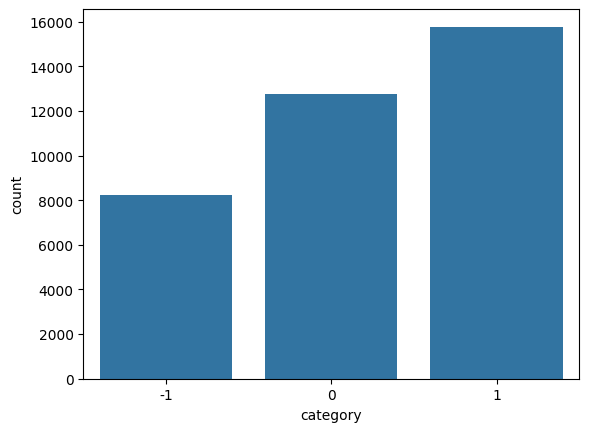

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = 'category')

In [26]:
# Frequncy distribution of sentitments
round(df['category'].value_counts(normalize = True) * 100, 2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

Find the word count in each comment and add it as a new feature in our dataset

In [27]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [28]:
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [29]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

1. Average word count in a sentence is 13 words.
2. Lowest word count is 1 word.
3. Highest word count is 1307 words in a sentence. 

Understand the distribution of word count in our dataset

C:\Users\RadhikaMaheshwari\AppData\Local\Temp\ipykernel_34216\696346186.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['word_count'], kde = True)


<Axes: xlabel='word_count', ylabel='Density'>

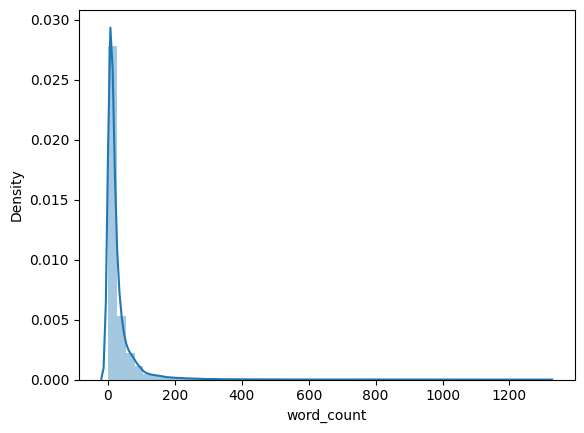

In [30]:
sns.distplot(df['word_count'], kde = True)

Understanding the word distribution per category

In [31]:
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

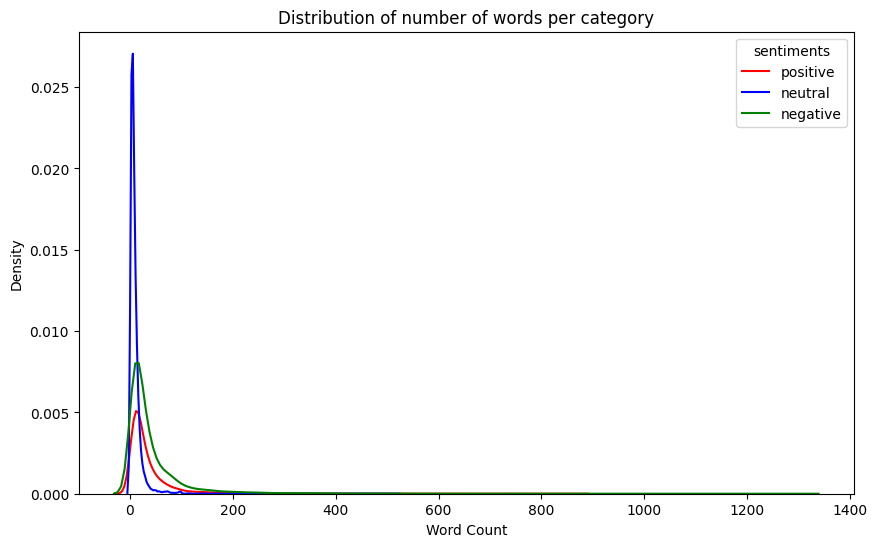

In [32]:
plt.figure(figsize = (10, 6))

sns.kdeplot(data = df, 
            hue = 'category', 
            x = 'word_count', 
            hue_order = [1, 0, -1], palette = {1: 'green', 0: 'blue',  -1: 'red'}).legend(title = 'sentiments', labels = ['positive', 'neutral', 'negative'])

plt.title("Distribution of number of words per category")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.legend

Positive comments tend to have a wider spread in word count indicating that longer comments are more common in positive sentiment.
Neutral comment's distribution appears to be concentrated more around shorter comments compared to positive or negative comments. 
Negative comments have a distribution somewhat similar to positive comments but with a smaller prop

Box plot on word count

<Axes: ylabel='word_count'>

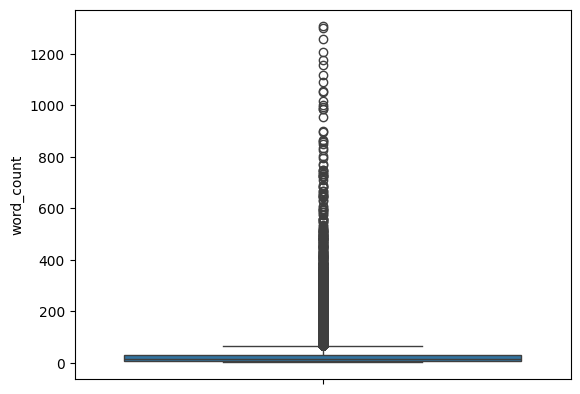

In [33]:
sns.boxplot(df['word_count'])

Boxplot for word count per category

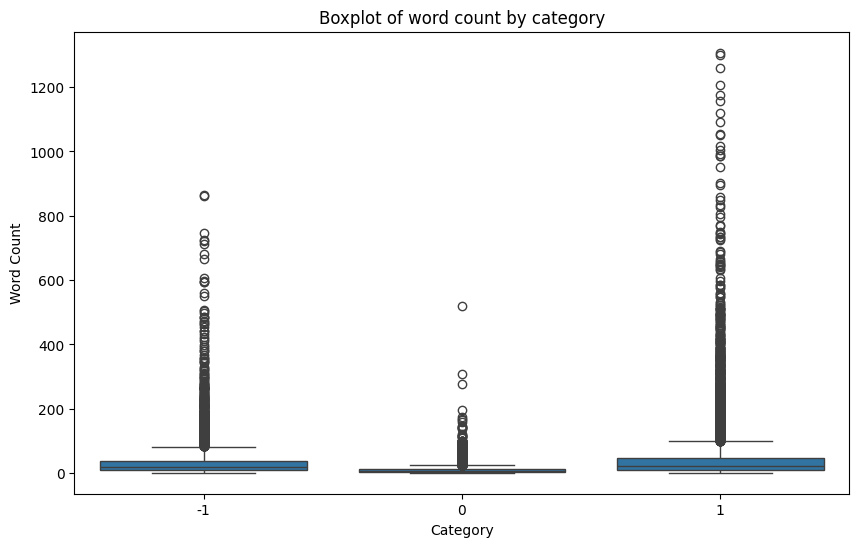

In [34]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'category', y = 'word_count')
plt.title('Boxplot of word count by category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

Positive comments: Median word count is relatively high. There are several outliers with longer comments indicating that positive comments tend to be more verbose

Neutral comments: Median word count is the lowest with a tighter IQR suggesting that neutral comments are generally shorter. 

Negative comments: Word count distribution is similar to positive comments but with a slightly lower median and fewer outliers. 

Scatterplot between category and word count to understand the relationship between them

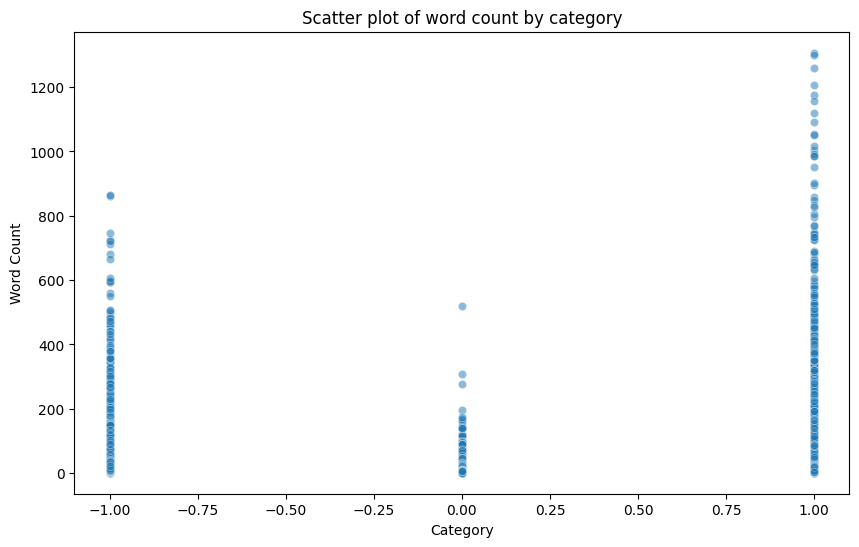

In [35]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'category', y = 'word_count', alpha = 0.5)
plt.title("Scatter plot of word count by category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

Plot the median word count for each category

<Axes: xlabel='category', ylabel='word_count'>

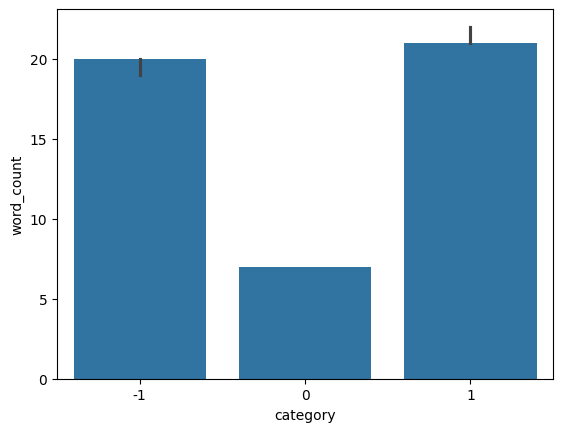

In [36]:
sns.barplot(df, x = 'category', y = 'word_count', estimator = 'median')

We can see that the neutral category has the lowest median word count followed by negative and then positive comments

In [37]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RadhikaMaheshwari\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# Define the list of stopwords in english

stop_words = set(stopwords.words('english'))

In [39]:
# Create a new column which will store the count of stop words in each comment

df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [40]:
df.head()

,clean_comment,category,word_count,num_stop_words
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


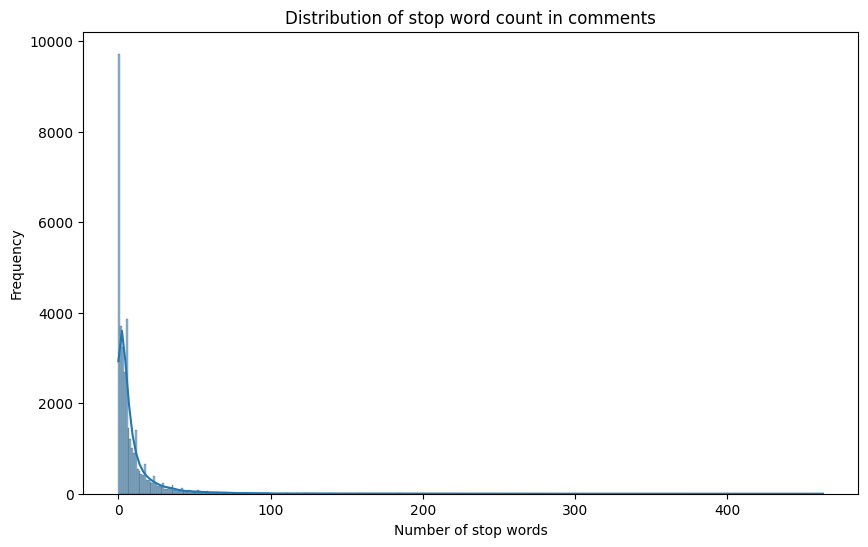

In [41]:
# Create the distribution plot for the num_stop_words column

plt.figure(figsize = (10, 6))
sns.histplot(df['num_stop_words'], kde = True)
plt.title("Distribution of stop word count in comments")
plt.xlabel("Number of stop words")
plt.ylabel("Frequency")
plt.show()

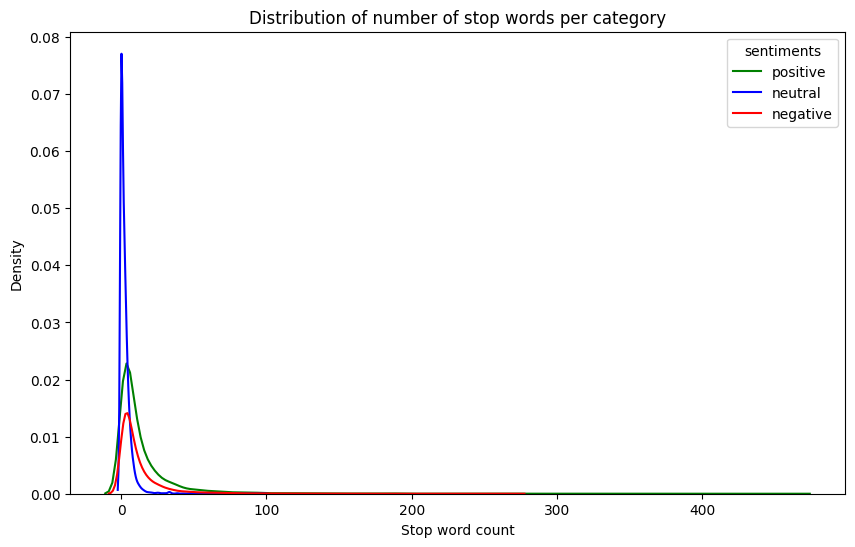

In [42]:
# Let us see the above distribution for the three different categories

plt.figure(figsize = (10, 6))
sns.kdeplot(data = df,
            hue = 'category',
            x = 'num_stop_words',
            hue_order = [-1, 0, 1],
            palette = {1:'green', 0: 'blue', -1 : 'red'},
            ).legend(title = 'sentiments', labels = ['positive', 'neutral', 'negative'])
plt.title("Distribution of number of stop words per category")
plt.xlabel("Stop word count")
plt.ylabel("Density")
plt.show()


Neutral words have a sharp, narrow peak concentrated arounf 1-10 stop words, indicating these comments are typically shorter and more concise. 
Positive coments show a broader distribution with peaks extending further right. suggesting they contain more stop words overall.
Negative comments display a distribution similar to positive but with slightly different density patterns

Neutral -> Lower stop word counts, shorter, more direct comments
positive -> higher stop word coun. Longer more elaborate expressions.
Negative -> Moderate stop word count. Medium length comments

<Axes: xlabel='category', ylabel='num_stop_words'>

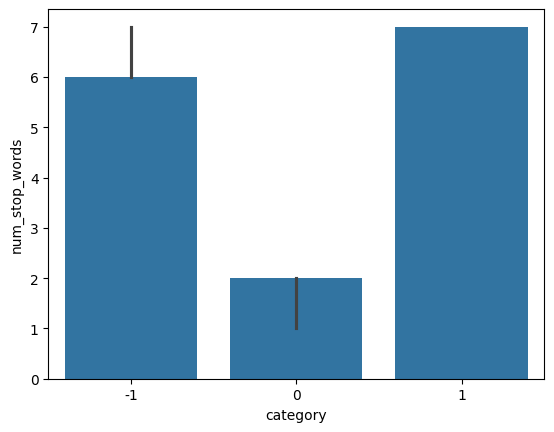

In [43]:
# Plotting a bar plot of median stop word count for each category

sns.barplot(df, x = 'category', y = 'num_stop_words', estimator = 'median')

Median stop word count is the lowest for neutral comments whereas positive comments have the highest median stop word count. This is the same observation that we have got from the kde plot above.

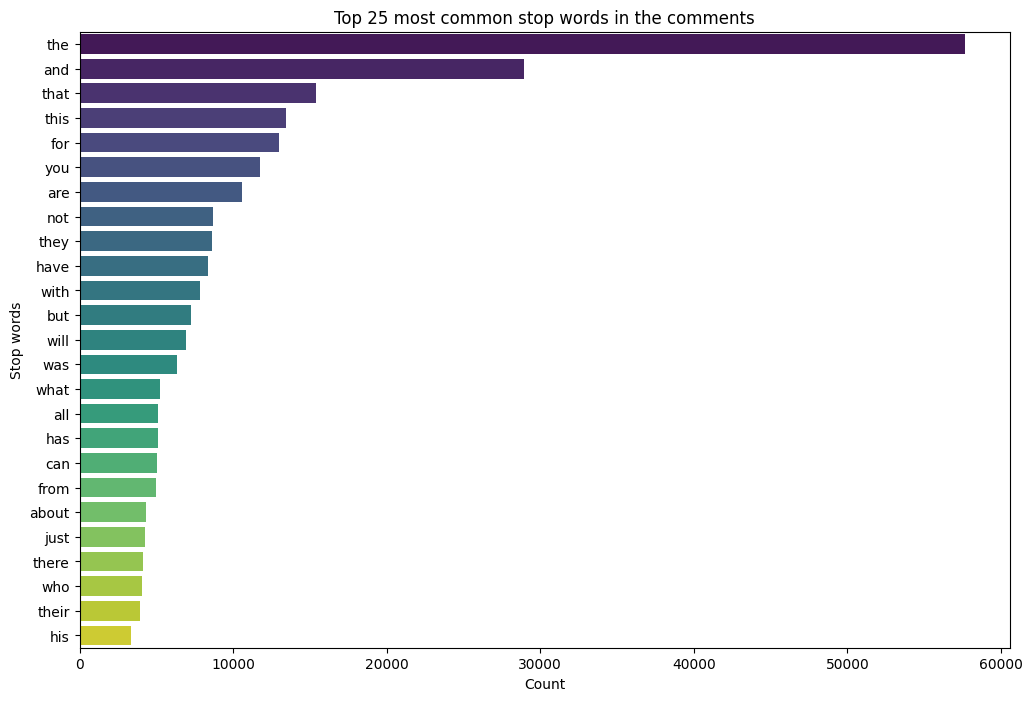

In [44]:
# Create a frequency distribution of stop words in the clean_comment column
# By this, we will be able to find the most fequent stop words used in the comments.

from collections import Counter

# Extract all the stop words from each comment
all_stop_words = [ word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Get the top 25 common stop words from all the comments
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words into a dataframe 
top_25_df = pd.DataFrame(most_common_stop_words, columns = ['stop_words', 'count'])

# Plot the top 25 most common stop words

plt.figure(figsize = (12, 8))
sns.barplot(data = top_25_df, x = 'count', y ='stop_words', hue = 'stop_words', palette = 'viridis', legend = False)
plt.title("Top 25 most common stop words in the comments")
plt.xlabel("Count")
plt.ylabel("Stop words")
plt.show()

In [45]:
top_25_df.head()

,stop_words,count
0,the,57669
1,and,28950
2,that,15372
3,this,13463
4,for,12976


In [46]:
df.head()

,clean_comment,category,word_count,num_stop_words
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


In [47]:
# Till now we have worked on the words. Now let us also get the count of the characters in each comment

df['num_char_count'] = df['clean_comment'].apply(len)
df.head() 

,clean_comment,category,word_count,num_stop_words,num_char_count
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [48]:
# Understanding the distribution of number of characters columm
df['num_char_count'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_char_count, dtype: float64

On an average, a comment can have about 180 characters with a minimum of 1 character. Maximum number of characters in a comment are 8664. 

In [49]:
# Get an understanding of the number of times a character is coming in our comments

# Combine all comments into one large string
all_text = ''.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a dataframe for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns = ['character', 'frequency']).sort_values(by = 'frequency', ascending = False)


In [50]:
char_frequency_df.head(25)

,character,frequency
6,,1054800
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [51]:
# New column to count the number of puncutations used in each comment

df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x : sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_char_count,num_punctuation_chars
17378,ucn speeds have forced her leaving him that cr...,-1,12,5,66,0
17311,spot indeed true communal assholes bjp have di...,1,15,4,102,0
7589,new player dark souls for anyway had the 360 h...,1,22,9,106,0
31190,thats usd subscription mind sharing some scree...,0,8,1,53,0
16201,psa for all the bhakts saying rss has woman wi...,1,43,18,245,0


In [52]:
# Understanding the distribution of number of punctuations in a comment
df['num_punctuation_chars'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

There are no punction marks present in any comments. Cleanup not required. 

In [53]:
# Getting the top 25 bigrams present in comments

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n = None):
    vec = CountVectorizer(ngram_range = (2, 2), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq_ = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(words_freq_, key = lambda x: x[1], reverse  = True)
    return word_freq[:n]

In [54]:
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

In [55]:
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns =['bigram', 'count'])

In [56]:
top_25_bigrams_df.head()

,bigram,count
0,free encyclopedia,623
1,encyclopedia team,598
2,good good,409
3,prime minister,389
4,best overall,375


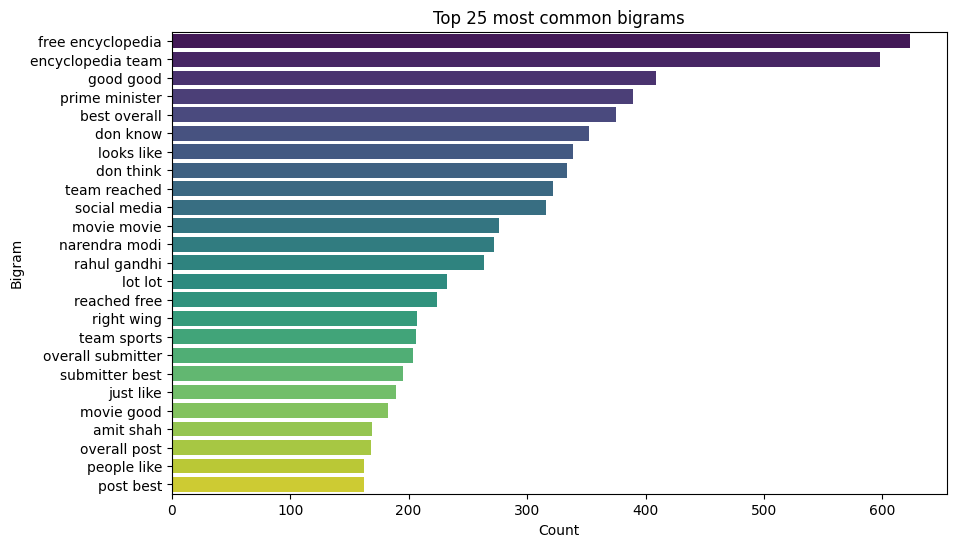

In [57]:
plt.figure(figsize = (10, 6))
sns.barplot(data = top_25_bigrams_df, x = 'count', y = 'bigram', hue = 'bigram', legend = False, palette = 'viridis')
plt.title("Top 25 most common bigrams")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.show()

C:\Users\RadhikaMaheshwari\AppData\Local\Temp\ipykernel_34216\2360501773.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_25_trigrams_df, x = 'count', y = 'trigram', palette = 'coolwarm')


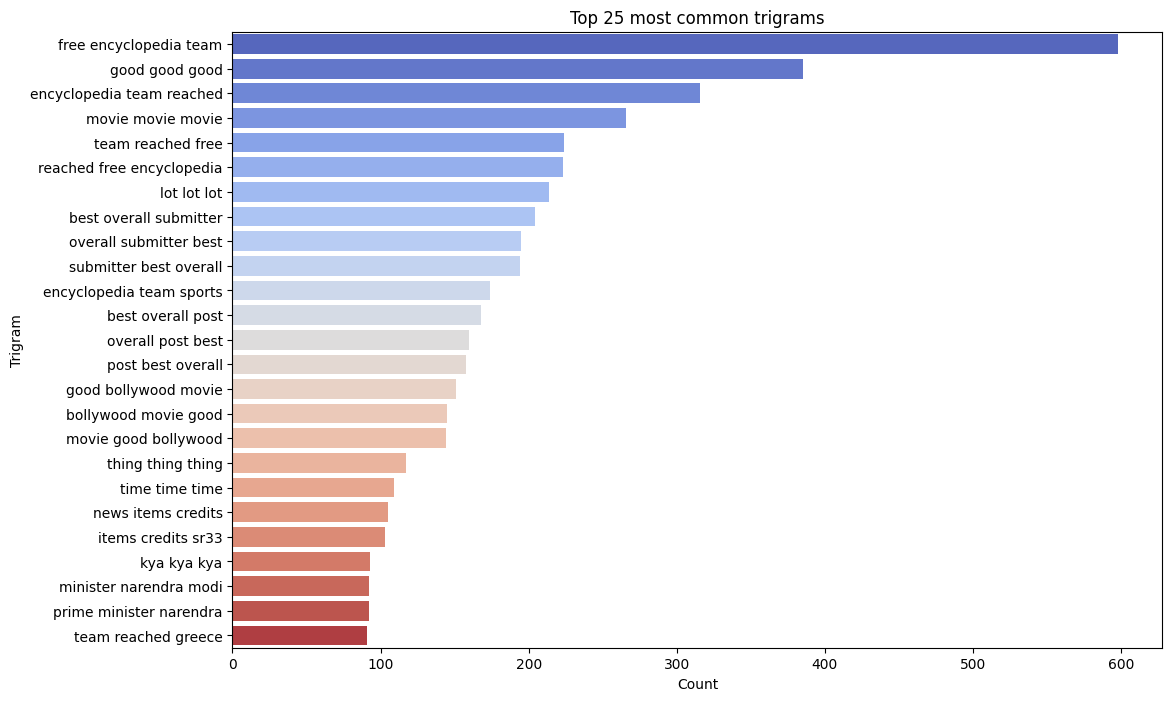

In [58]:
# Create a function to extract the top 25 trigrams

def get_top_trigrams(corpus, n = None):
    vec = CountVectorizer(ngram_range = (3, 3), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]


# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Conver the trigrams into dict
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns =['trigram', 'count'])

# Plot the countplot for top 25 trigrams
plt.figure(figsize = (12, 8))
sns.barplot(data = top_25_trigrams_df, x = 'count', y = 'trigram', palette = 'coolwarm')
plt.title("Top 25 most common trigrams")
plt.xlabel("Count")
plt.ylabel("Trigram")
plt.show()

In [59]:
# Remove non english characters from clean_comment column
# Keeping only standard english letters, digits and common punctuations

import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [61]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(),
                    columns = ['character', 'frequency']).sort_values(by = 'frequency', ascending = False)


char_frequency_df           

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [62]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_char_count,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [64]:
# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Removing stop words from clean_comment but retaining the essential ones
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [65]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_char_count,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()


df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RadhikaMaheshwari\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_char_count,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


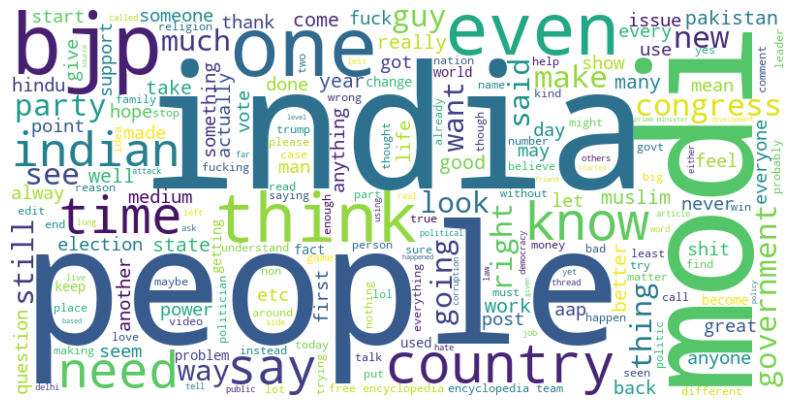

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(' '.join(text))
    plt.figure(figsize = (10, 6))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(df['clean_comment'])

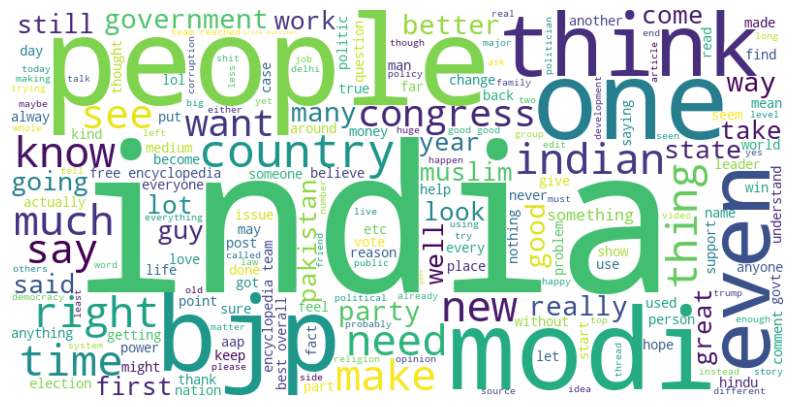

In [70]:
plot_word_cloud(df[df['category'] == 1]['clean_comment'])

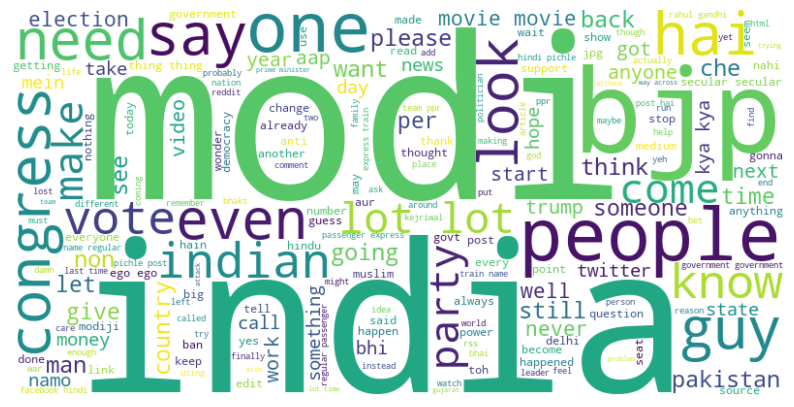

In [71]:
plot_word_cloud(df[df['category'] == 0]['clean_comment'])

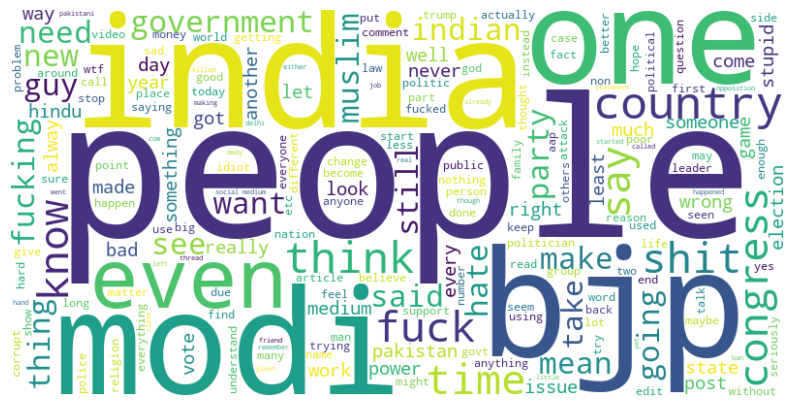

In [72]:
plot_word_cloud(df[df['category'] == -1]['clean_comment'])

In [77]:
def plot_top_n_words(df, n = 20):
    "Plot the top N most frequent words in the dataset"
    words = ' '.join(df['clean_comment']).split()

    # Get the top N Most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their count for plotting
    words, count = zip(*most_common_words)

    # plot 
    plt.figure(figsize = (10, 6))
    sns.barplot(x = list(count), y = list(words))
    plt.title(f"Top {n} most frequent words")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

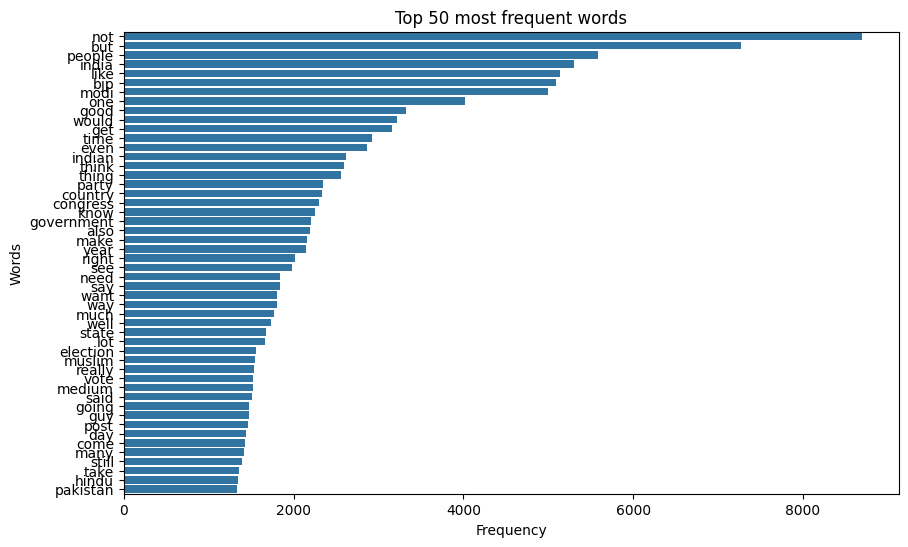

In [78]:
plot_top_n_words(df, n = 50)

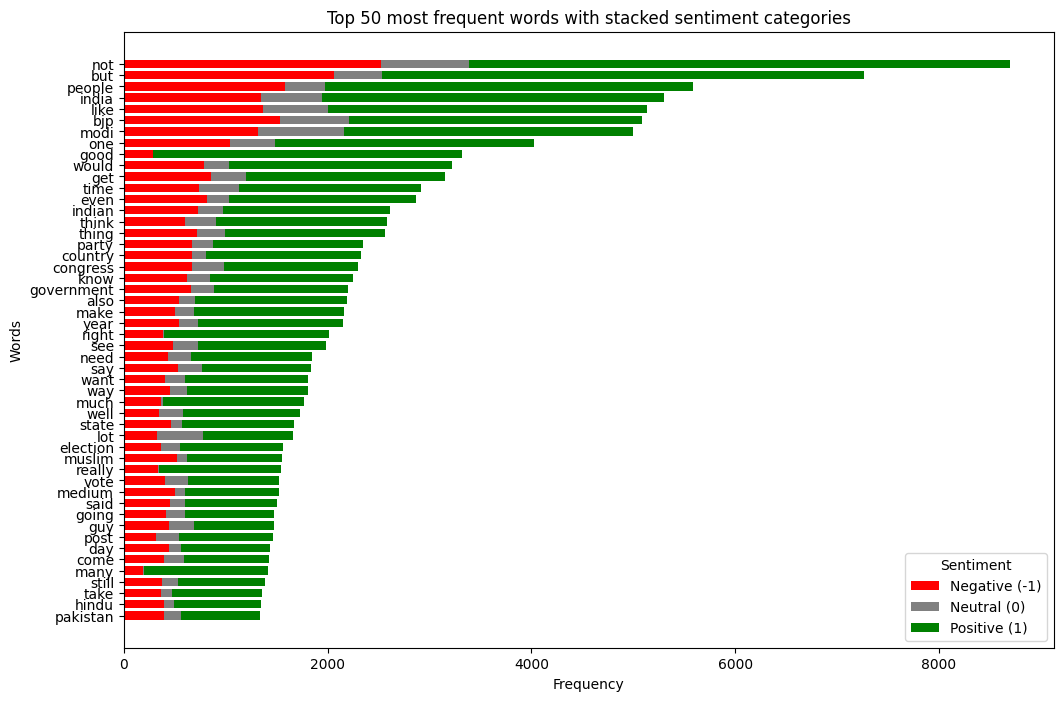

In [93]:
def plot_top_n_words_by_category(df, n = 20, start = 0):
    """
        Plot the top N most frequent words in the dataset wuth stacked hue based on sentiment category
    """

    word_category_count = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']

        for word in words:
            if word not in word_category_count:
                # Initialise counts for each sentiment category
                word_category_count[word] = {-1: 0, 0:0, 1:0}
            # Increment the count for each sentiment category
            word_category_count[word][category] += 1
    
    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_count.items()}

    # GEt the top n mosr frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key = lambda x: x[1], reverse = True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_count[word][-1] for word in top_words]
    neutral_counts = [word_category_count[word][0] for word in top_words]
    positive_counts = [word_category_count[word][1] for word in top_words]

    plt.figure(figsize = (12, 8))
    bar_width = 0.74

    plt.barh(word_labels, negative_counts, color = 'red', label = 'Negative (-1)', height = bar_width)
    plt.barh(word_labels, neutral_counts, color = 'gray', label = 'Neutral (0)', height = bar_width, left = negative_counts)
    plt.barh(word_labels, positive_counts, color = 'green', label = "Positive (1)", height = bar_width, left = [i+j for i, j in zip(negative_counts, neutral_counts)])

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} most frequent words with stacked sentiment categories')
    plt.legend(title = 'Sentiment', loc = 'lower right')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_n_words_by_category(df, n = 50)